In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [3]:
pt.__version__

'1.0.7'

# All Liquids

In [4]:
Liq_only=pt.import_excel(filename=r'..\LEPR_Wet_Stitched_Sept2022.xlsx', 
                         sheet_name='Liq')

Liq_only_input=Liq_only['my_input']

notinLEPR= Liq_only_input['Citation'].str.contains('notinLEPR')
notinKeith=((Liq_only_input['Citation'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|
(Liq_only_input['Citation'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)')))
newMask=notinLEPR|notinKeith
newMask=newMask.fillna(False)

mask_1GPa=Liq_only_input['P_kbar']<=13
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

myLiquids1=Liq_only['Liqs'].loc[Press_new]
Liq_only_input=Liq_only['my_input'].loc[Press_new]

## Finding Quant Water


VBD_cal_mask=Liq_only_input['H2O_Liq_Method'].str.contains('VBD_GSC')
VBD_cal_mask=VBD_cal_mask.fillna(False)

VBD_mask=Liq_only_input['H2O_Liq_Method'].str.contains('VBD')
VBD_mask=VBD_mask.fillna(False)
FTIR_mask=Liq_only_input['H2O_Liq_Method'].str.contains('FTIR')
FTIR_mask=FTIR_mask.fillna(False)
SIMS_mask=Liq_only_input['H2O_Liq_Method'].str.contains('SIMS')
SIMS_mask=SIMS_mask.fillna(False)
Raman_mask=Liq_only_input['H2O_Liq_Method'].str.contains('Raman')
Raman_mask=Raman_mask.fillna(False)
Sol_mask=Liq_only_input['H2O_Liq_Method'].str.contains('Sol')
Sol_mask=Sol_mask.fillna(False)
balance_mask=Liq_only_input['H2O_Liq_Method'].str.contains('balance')
balance_mask=balance_mask.fillna(False)

added_mask=Liq_only_input['H2O_Liq_Method'].str.contains('added')
added_mask=added_mask.fillna(False)
Quantmethod1=FTIR_mask|SIMS_mask|Raman_mask

nonzero=Liq_only_input['H2O_Liq']>0
Quantmethod=(VBD_cal_mask|FTIR_mask|SIMS_mask|Raman_mask)&nonzero
NonQuantmethod=(VBD_mask&~VBD_cal_mask)|balance_mask|added_mask
NoH2O=Liq_only_input['H2O_Liq_Method']==0
NoH2O=NoH2O.fillna(False)


C:\Users\penny\AppData\Local\Temp\ipykernel_22488\1532556750.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=((Liq_only_input['Citation'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|
C:\Users\penny\AppData\Local\Temp\ipykernel_22488\1532556750.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (Liq_only_input['Citation'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)')))


In [5]:
np.mean(Liq_only_input['H2O_Liq'])


4.544902430552375

In [6]:
np.min(Liq_only_input['H2O_Liq'])


-0.4299999999999784

In [7]:
np.median(Liq_only_input['H2O_Liq'])

4.8

## Loading olivine liquid data the same way

In [8]:
Liq_Ol=pt.import_excel(filename=r'..\LEPR_Wet_Stitched_Sept2022.xlsx', 
                         sheet_name='Ol-Liq')

Liq_Ol_input=Liq_Ol['my_input']

# Filting those out which were in LEPR so used in calibration

notinLEPR_Ol= Liq_Ol_input['Citation_x'].str.contains('notinLEPR')
notinKeith_Ol=((Liq_Ol_input['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))
|(Liq_Ol_input['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)')))
newMask_Ol=notinLEPR_Ol|notinKeith_Ol
newMask_Ol=newMask_Ol.fillna(False)

# Setting a pressure filter

mask_1GPa_Ol=Liq_Ol_input['P_kbar_x']<=13
mask_1GPa_Ol=mask_1GPa_Ol.fillna(False)

Press_new_Ol=mask_1GPa_Ol&newMask_Ol
Press_new_Ol=Press_new_Ol.fillna(False)

myLiquids1_Ol=Liq_Ol['Liqs'].loc[Press_new_Ol]
Liq_Ol_input=Liq_Ol['my_input'].loc[Press_new_Ol]

# Finding the method used to measure H2O

VBD_cal_mask_Ol=Liq_Ol_input['H2O_Liq_Method'].str.contains('VBD_GSC')
VBD_cal_mask_Ol=VBD_cal_mask_Ol.fillna(False)

VBD_mask_Ol=Liq_Ol_input['H2O_Liq_Method'].str.contains('VBD')
VBD_mask_Ol=VBD_mask_Ol.fillna(False)
FTIR_mask_Ol=Liq_Ol_input['H2O_Liq_Method'].str.contains('FTIR')
FTIR_mask_Ol=FTIR_mask_Ol.fillna(False)
SIMS_mask_Ol=Liq_Ol_input['H2O_Liq_Method'].str.contains('SIMS')
SIMS_mask_Ol=SIMS_mask_Ol.fillna(False)
Raman_mask_Ol=Liq_Ol_input['H2O_Liq_Method'].str.contains('Raman')
Raman_mask_Ol=Raman_mask_Ol.fillna(False)
Sol_mask_Ol=Liq_Ol_input['H2O_Liq_Method'].str.contains('Sol')
Sol_mask_Ol=Sol_mask_Ol.fillna(False)
balance_mask_Ol=Liq_Ol_input['H2O_Liq_Method'].str.contains('balance')
balance_mask_Ol=balance_mask_Ol.fillna(False)

added_mask_Ol=Liq_Ol_input['H2O_Liq_Method'].str.contains('added')
added_mask_Ol=added_mask_Ol.fillna(False)
Quantmethod1_Ol=FTIR_mask_Ol|SIMS_mask_Ol|Raman_mask_Ol

nonzero_Ol=Liq_Ol_input['H2O_Liq']>0


Quantmethod_Ol=(VBD_cal_mask_Ol|FTIR_mask_Ol|SIMS_mask_Ol|Raman_mask_Ol)&nonzero_Ol
NonQuantmethod_Ol=(VBD_mask_Ol&~VBD_cal_mask_Ol)|balance_mask_Ol|added_mask_Ol
NoH2O_Ol=Liq_Ol_input['H2O_Liq_Method']==0
NoH2O_Ol=NoH2O_Ol.fillna(False)


C:\Users\penny\AppData\Local\Temp\ipykernel_22488\2885635310.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith_Ol=((Liq_Ol_input['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))
C:\Users\penny\AppData\Local\Temp\ipykernel_22488\2885635310.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  |(Liq_Ol_input['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)')))


In [9]:
np.min(Liq_only_input['H2O_Liq'].loc[Quantmethod])


0.04

In [10]:
np.max(Liq_only_input['H2O_Liq'].loc[Quantmethod])


12.3

In [11]:
np.median(Liq_only_input['H2O_Liq'].loc[Quantmethod])


3.5849999999999937

In [12]:
len(Liq_only_input.loc[Quantmethod])


534

## sensitivity to H2O content

In [13]:
rand_choice=myLiquids1.loc[Quantmethod].index.values
choose=np.random.choice(rand_choice, 40)
choose

array([1888, 1572, 1148, 1140, 1092, 1294,  898,  842, 1164, 1567, 1290,
       1150, 1757, 1282, 1759, 1830, 1310, 1001, 1350, 1313, 1145, 1039,
       1262, 1336, 1880, 1243, 1757, 1319, 1314, 1786, 1555, 1566, 1576,
        859, 1317, 1272, 1173,  849, 1344, 1285], dtype=int64)

In [14]:
Filt=[1892, 1282, 1866, 1888,  862,  879, 1037, 1037, 1792,  835, 1750,
       1021, 1854, 1069, 1740, 1762, 1211, 1196, 1148, 1281, 1568,  881,
       1026, 1172, 1874, 1167, 1275, 1265, 1031, 1895, 1849, 1012, 1303,
        841, 1149, 1745, 1274, 1208, 1853,  860]

In [15]:
delta_H_lin=np.linspace(-3, 3, 100)
HSens_eq14=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)
HSens_eq15=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)

HSens_eq19Dmg=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)
HSens_eq21Dmg=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)
HSens_eq22Dmg=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)
HSens_Shi=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)
H_used=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)
for i in range(0, len(delta_H_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
    HSens_eq14[i]=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
    H2O_Liq=myLiquids1['H2O_Liq'].loc[Filt]+delta_H_lin[i],
                equationT='T_Put2008_eq14')
    
    H_used[i]=myLiquids1['H2O_Liq'].loc[Filt]+delta_H_lin[i]
    
    HSens_eq15[i]=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
    H2O_Liq=myLiquids1['H2O_Liq'].loc[Filt]+delta_H_lin[i],
                equationT='T_Put2008_eq15', P=Liq_only_input['P_kbar'].loc[Filt])
    
    HSens_eq19Dmg[i]=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
    H2O_Liq=myLiquids1['H2O_Liq'].loc[Filt]+delta_H_lin[i],
                equationT='T_Put2008_eq19_BeattDMg', P=Liq_only_input['P_kbar'].loc[Filt])

    HSens_eq21Dmg[i]=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
    H2O_Liq=myLiquids1['H2O_Liq'].loc[Filt]+delta_H_lin[i],
                equationT='T_Put2008_eq21_BeattDMg', P=Liq_only_input['P_kbar'].loc[Filt])

    HSens_eq22Dmg[i]=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
    H2O_Liq=myLiquids1['H2O_Liq'].loc[Filt]+delta_H_lin[i],
                equationT='T_Put2008_eq22_BeattDMg', P=Liq_only_input['P_kbar'].loc[Filt])

    HSens_Shi[i]=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
    H2O_Liq=myLiquids1['H2O_Liq'].loc[Filt]+delta_H_lin[i],
                equationT='T_Shi_Test', P=Liq_only_input['P_kbar'].loc[Filt])

    
Exp_HSens_eq14=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
                equationT='T_Put2008_eq14')
Exp_HSens_eq15=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
                equationT='T_Put2008_eq15', P=Liq_only_input['P_kbar'].loc[Filt])

Exp_HSens_eq19Dmg=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
                equationT='T_Put2008_eq19_BeattDMg', P=Liq_only_input['P_kbar'].loc[Filt])

Exp_HSens_eq21Dmg=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
                equationT='T_Put2008_eq21_BeattDMg', P=Liq_only_input['P_kbar'].loc[Filt])

Exp_HSens_eq22Dmg=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
                equationT='T_Put2008_eq22_BeattDMg', P=Liq_only_input['P_kbar'].loc[Filt])

Exp_HSens_Shi=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
                equationT='T_Shi_Test', P=Liq_only_input['P_kbar'].loc[Filt])

## Assesing pressure sensitivity

In [16]:
delta_P_lin=np.linspace(-5, 5, 100)
PSens_eq14=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)
PSens_eq15=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)

PSens_eq19Dmg=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)
PSens_eq21Dmg=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)
PSens_eq22Dmg=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)
PSens_Shi=np.empty([len(delta_H_lin), len(myLiquids1.loc[Filt])], dtype=float)

for i in range(0, len(delta_H_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
    PSens_eq14[i]=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
    H2O_Liq=myLiquids1['H2O_Liq'].loc[Filt],
                equationT='T_Put2008_eq14')
    
    PSens_eq15[i]=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
    H2O_Liq=myLiquids1['H2O_Liq'].loc[Filt],
                equationT='T_Put2008_eq15', P=Liq_only_input['P_kbar'].loc[Filt]+delta_P_lin[i])
    
    PSens_eq19Dmg[i]=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
    H2O_Liq=myLiquids1['H2O_Liq'].loc[Filt],
                equationT='T_Put2008_eq19_BeattDMg', P=Liq_only_input['P_kbar'].loc[Filt]+delta_P_lin[i])

    PSens_eq21Dmg[i]=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
    H2O_Liq=myLiquids1['H2O_Liq'].loc[Filt],
                equationT='T_Put2008_eq21_BeattDMg', P=Liq_only_input['P_kbar'].loc[Filt]+delta_P_lin[i])

    PSens_eq22Dmg[i]=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
    H2O_Liq=myLiquids1['H2O_Liq'].loc[Filt],
                equationT='T_Put2008_eq22_BeattDMg', P=Liq_only_input['P_kbar'].loc[Filt]+delta_P_lin[i])
    
    PSens_Shi[i]=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
    H2O_Liq=myLiquids1['H2O_Liq'].loc[Filt],
                equationT='T_Shi_Test', P=Liq_only_input['P_kbar'].loc[Filt]+delta_P_lin[i])
    
    
    
    
    
Exp_PSens_eq14=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
                equationT='T_Put2008_eq14')
Exp_PSens_eq15=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
                equationT='T_Put2008_eq15', P=Liq_only_input['P_kbar'].loc[Filt])

Exp_PSens_eq19Dmg=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
                equationT='T_Put2008_eq19_BeattDMg', P=Liq_only_input['P_kbar'].loc[Filt])

Exp_PSens_eq21Dmg=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
                equationT='T_Put2008_eq21_BeattDMg', P=Liq_only_input['P_kbar'].loc[Filt])

Exp_PSens_eq22Dmg=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
                equationT='T_Put2008_eq22_BeattDMg', P=Liq_only_input['P_kbar'].loc[Filt])

Exp_PSens_Shi=pt.calculate_liq_only_temp(liq_comps=myLiquids1.loc[Filt],
                equationT='T_Shi_Test', P=Liq_only_input['P_kbar'].loc[Filt])

In [17]:
print(np.average(HSens_eq14[0, :]-HSens_eq14[-1, :])/6)
print(np.average(HSens_eq15[0, :]-HSens_eq15[-1, :])/6)
print(np.average(HSens_eq21Dmg[0, :]-HSens_eq21Dmg[-1, :])/6)
print(np.average(HSens_eq22Dmg[0, :]-HSens_eq22Dmg[-1, :])/6)
print(np.nanmean(HSens_Shi[0, :]-HSens_Shi[-1, :])/6)

9.176
12.829999999999998
14.834239307614354
15.961121247354386
14.393029664044318


In [18]:
print(np.average(PSens_eq14[0, :]-PSens_eq14[-1, :])/10)
print(np.average(PSens_eq15[0, :]-PSens_eq15[-1, :])/10)
print(np.average(PSens_eq19Dmg[0, :]-PSens_eq19Dmg[-1, :])/10)

print(np.average(PSens_eq21Dmg[0, :]-PSens_eq21Dmg[-1, :])/10)
print(np.average(PSens_eq22Dmg[0, :]-PSens_eq22Dmg[-1, :])/10)
print(np.average(PSens_Shi[0, :]-PSens_Shi[-1, :])/10)

0.0
-3.915999999999999
-4.988315782024759
-1.252834068971739
-5.239114294014953
-6.113449845000004


In [19]:
## Calculations for eq22, the best equation

eq22Dmg=pt.calculate_liq_only_temp(liq_comps=myLiquids1,
                equationT='T_Put2008_eq22_BeattDMg', P=Liq_only_input['P_kbar'].loc[Press_new])

eq22Dmg_ol=pt.calculate_liq_only_temp(liq_comps=myLiquids1_Ol,
                equationT='T_Put2008_eq22_BeattDMg', P=Liq_Ol_input['P_kbar_x'].loc[Press_new_Ol])

eqShi_ol=pt.calculate_liq_only_temp(liq_comps=myLiquids1_Ol,
                equationT='T_Shi_Test', P=Liq_Ol_input['P_kbar_x'].loc[Press_new_Ol])

eqShi=pt.calculate_liq_only_temp(liq_comps=myLiquids1,
                equationT='T_Shi_Test', P=Liq_only_input['P_kbar'].loc[Press_new])



## REading in MELTS_MageMin and MELTS_MageMin

In [20]:
MELTS_MageMin=pd.read_excel('MELTS_MageMin_Liquidus.xlsx', sheet_name='Sheet1')
MELTS_MageMinQuantMethod=(((MELTS_MageMin['H2O_Liq_Method']=='FTIR')|(MELTS_MageMin['H2O_Liq_Method']=='SIMS')
|(MELTS_MageMin['H2O_Liq_Method']=='Raman')|(MELTS_MageMin['H2O_Liq_Method']=='VBD_GSC')
                  ) & (MELTS_MageMin['H2O_Liq']>0))

## Assing Shi

In [21]:
#Shi_Cali=pd.read_excel('Shi_Cali_Dataset.xlsx', sheet_name='Shi_Cali_Dataset')

In [22]:
#Shi_Cali['Author (year)'].unique()
# only one that overlaps is Almeev

In [23]:
Liq_Ol_input['Citation_x'].loc[Press_new_Ol&Quantmethod_Ol].unique()

array(['Hamada2008_notinLEPR', 'Parmon2011_notinLEPR',
       'Feig2010_notinLEPR', 'Pichavent2007_notinLEPR',
       'Nandekar2014_notinLEPR', 'Melekhova2015_notinLEPR',
       'Ulmer2018_notinLEPR', 'Almeev2013_notinLEPR',
       'Parat2014_notinLEPR'], dtype=object)

Text(0.5, 1.0, 'Shi')

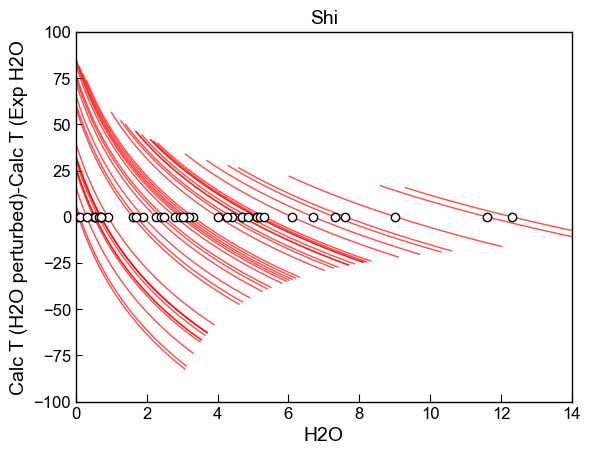

In [24]:


for i in range(0, np.shape(HSens_eq14)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    liqs=myLiquids1['H2O_Liq'].loc[Filt]
    plt.plot(delta_H_lin+liqs.iloc[i], -(Exp_HSens_Shi.iloc[i]-HSens_Shi[:, i]),
             '-', color='red', alpha=0.7, lw=1)
plt.plot(Liq_only_input['H2O_Liq'].loc[Filt],
         Liq_only_input['H2O_Liq'].loc[Filt]*0,
    'ok', mfc='white')  
plt.ylabel('Calc T (H2O perturbed)-Calc T (Exp H2O')
plt.xlabel('H2O')
plt.xlim([0, 14])
plt.ylim([-100, 100])
plt.title('Shi')

Text(0.5, 1.0, 'Put eq22 (red) vs. Shi (blue)')

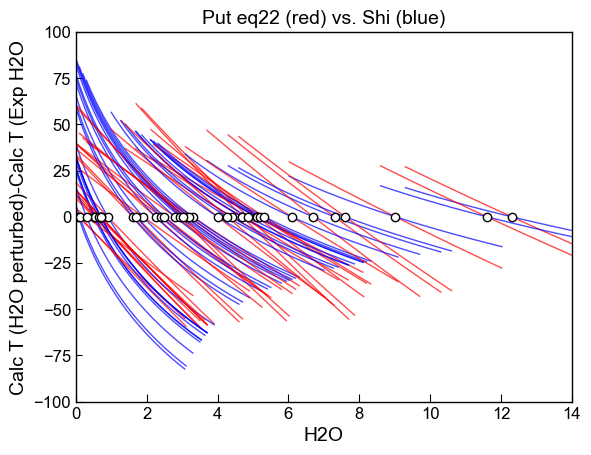

In [25]:


for i in range(0, np.shape(HSens_eq14)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    liqs=myLiquids1['H2O_Liq'].loc[Filt]
    plt.plot(delta_H_lin+liqs.iloc[i], -(Exp_HSens_eq22Dmg.iloc[i]-HSens_eq22Dmg[:, i]),
             '-', color='red', alpha=0.7, lw=1)
    plt.plot(delta_H_lin+liqs.iloc[i], -(Exp_HSens_Shi.iloc[i]-HSens_Shi[:, i]),
             '-', color='blue', alpha=0.7, lw=1)
plt.plot(Liq_only_input['H2O_Liq'].loc[Filt],
         Liq_only_input['H2O_Liq'].loc[Filt]*0,
    'ok', mfc='white')  
plt.ylabel('Calc T (H2O perturbed)-Calc T (Exp H2O')
plt.xlabel('H2O')
plt.xlim([0, 14])
plt.ylim([-100, 100])
plt.title('Put eq22 (red) vs. Shi (blue)')

Text(0.5, 1.0, 'Put eq22 vs. Shi')

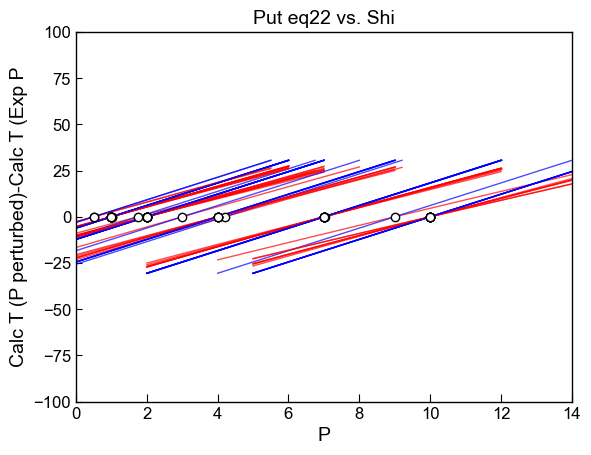

In [26]:


for i in range(0, np.shape(HSens_eq14)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    liqs=Liq_only_input['P_kbar'].loc[Filt]
    plt.plot(delta_P_lin+liqs.iloc[i], -(Exp_PSens_eq22Dmg.iloc[i]-PSens_eq22Dmg[:, i]),
             '-', color='red', alpha=0.7, lw=1)
    plt.plot(delta_P_lin+liqs.iloc[i], -(Exp_PSens_Shi.iloc[i]-PSens_Shi[:, i]),
             '-', color='blue', alpha=0.7, lw=1)
plt.plot(Liq_only_input['P_kbar'].loc[Filt],
         Liq_only_input['P_kbar'].loc[Filt]*0,
    'ok', mfc='white')  
plt.ylabel('Calc T (P perturbed)-Calc T (Exp P')
plt.xlabel('P')
plt.xlim([0, 14])
plt.ylim([-100, 100])
plt.title('Put eq22 vs. Shi')

Text(0.5, 1.0, 'Ol-bearing')

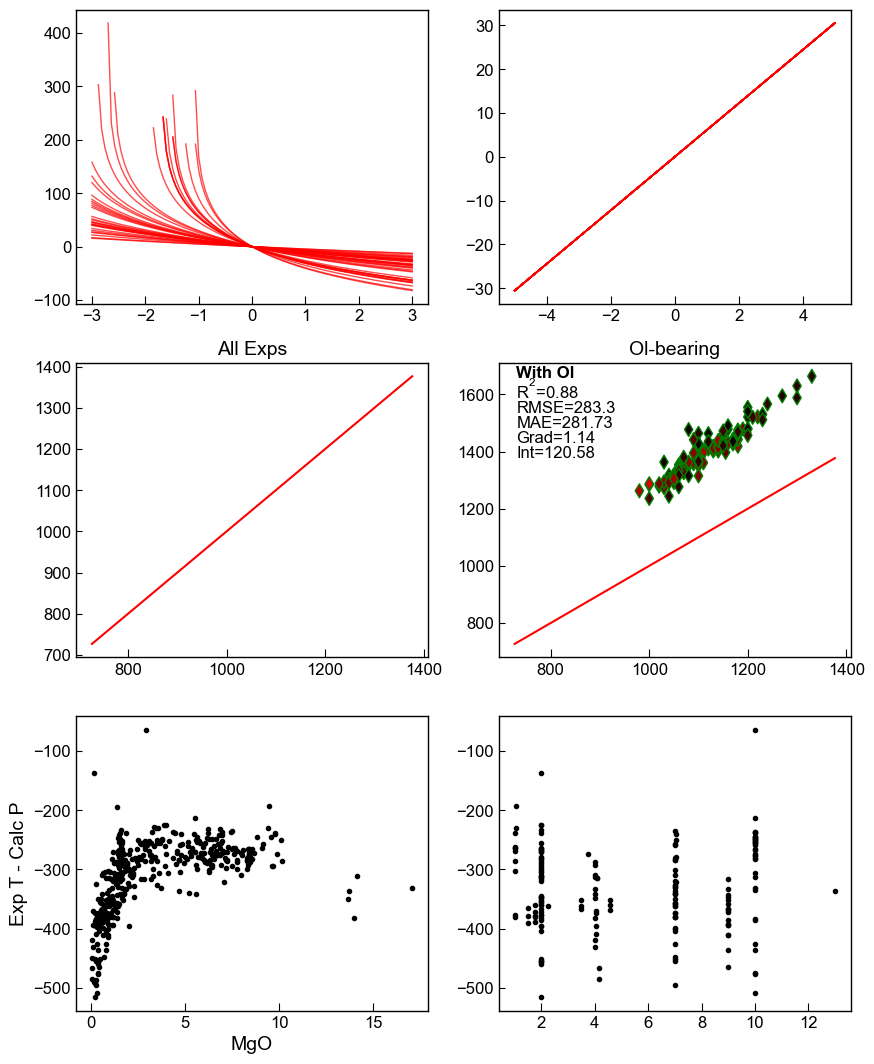

In [27]:
## Shi ones
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10,13))
for i in range(0, np.shape(HSens_eq14)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    ax1.plot(delta_H_lin, -(Exp_HSens_Shi.iloc[i]-HSens_Shi[:, i]),
             '-', color='red', alpha=0.7, lw=1)

    ax2.plot(delta_P_lin, -(Exp_PSens_Shi.iloc[i]-PSens_Shi[:, i]),
             '-', color='red', alpha=0.7, lw=1)

Liq_has_Ol=Liq_only_input['Ol']=="Yes"
ax3.plot([1000-273.15, 1650-273.15], [1000-273.15, 1650-273.15], '-r')
ax4.plot([1000-273.15, 1650-273.15], [1000-273.15, 1650-273.15], '-r')

NotAl=Liq_Ol_input['Citation_x']!="Almeev2013_notinLEPR"
s=ax3.scatter(Liq_only_input['T_K'].loc[Press_new&Quantmethod&(~Liq_has_Ol)&NotAl]-273.15,
            eqShi[Quantmethod&(~Liq_has_Ol)&NotAl], marker='s', s=40, edgecolors='k', linewidths=0.5,
            c=Liq_only_input['SiO2_Liq'].loc[Press_new&Quantmethod&(~Liq_has_Ol)&NotAl], cmap='hot',
vmin = 45, vmax = 80)

s=ax4.scatter(Liq_Ol_input['T_K_x'].loc[Press_new_Ol&Quantmethod_Ol&NotAl]-273.15,
            eqShi_ol[Quantmethod_Ol&NotAl], marker='d', s=50, edgecolors='g', linewidths=1,
            c=Liq_Ol_input['SiO2_Liq'].loc[Press_new_Ol&Quantmethod_Ol&NotAl], cmap='hot',
vmin = 45, vmax = 80)

Stats_WithOl=pt.calculate_R2(Liq_Ol_input['T_K_x'].loc[Press_new_Ol&Quantmethod_Ol&NotAl]-273.15, 
            eqShi_ol[Quantmethod_Ol&NotAl], xy=False, df=True)

ax4.annotate("With Ol", xy=(0.05, 0.95),
xycoords="axes fraction", fontsize=12, weight='bold')
ax4.annotate("R$^{2}$="+str(Stats_WithOl['R2'].iloc[0]), xy=(0.05, 0.88),
xycoords="axes fraction", fontsize=12)
ax4.annotate("RMSE="+str(Stats_WithOl['RMSE'].iloc[0]), xy=(0.05, 0.83),
xycoords="axes fraction", fontsize=12)
ax4.annotate("MAE="+str(Stats_WithOl['Mean'].iloc[0]), xy=(0.05, 0.78),
xycoords="axes fraction", fontsize=12)
ax4.annotate("Grad="+str(Stats_WithOl['Grad'].iloc[0]), xy=(0.05, 0.73),
xycoords="axes fraction", fontsize=12)
ax4.annotate("Int="+str(Stats_WithOl['Int'].iloc[0]), xy=(0.05, 0.68),
xycoords="axes fraction", fontsize=12)


ax5.plot(Liq_only_input['MgO_Liq'].loc[Press_new&Quantmethod&(~Liq_has_Ol)],
    Liq_only_input['T_K'].loc[Press_new&Quantmethod&(~Liq_has_Ol)]-273.15-eqShi[Quantmethod&(~Liq_has_Ol)],
         '.k')
ax5.set_xlabel('MgO')
ax5.set_ylabel('Exp T - Calc P')

HighMgO=Liq_only_input['H2O_Liq']>4
ax6.plot(Liq_only_input['P_kbar'].loc[Press_new&Quantmethod&(~Liq_has_Ol)&HighMgO],
    Liq_only_input['T_K'].loc[Press_new&Quantmethod&(~Liq_has_Ol)&HighMgO]-273.15-eqShi[Quantmethod&(~Liq_has_Ol)&HighMgO],
         '.k')

ax3.set_title('All Exps')
ax4.set_title('Ol-bearing')

## Figure for review

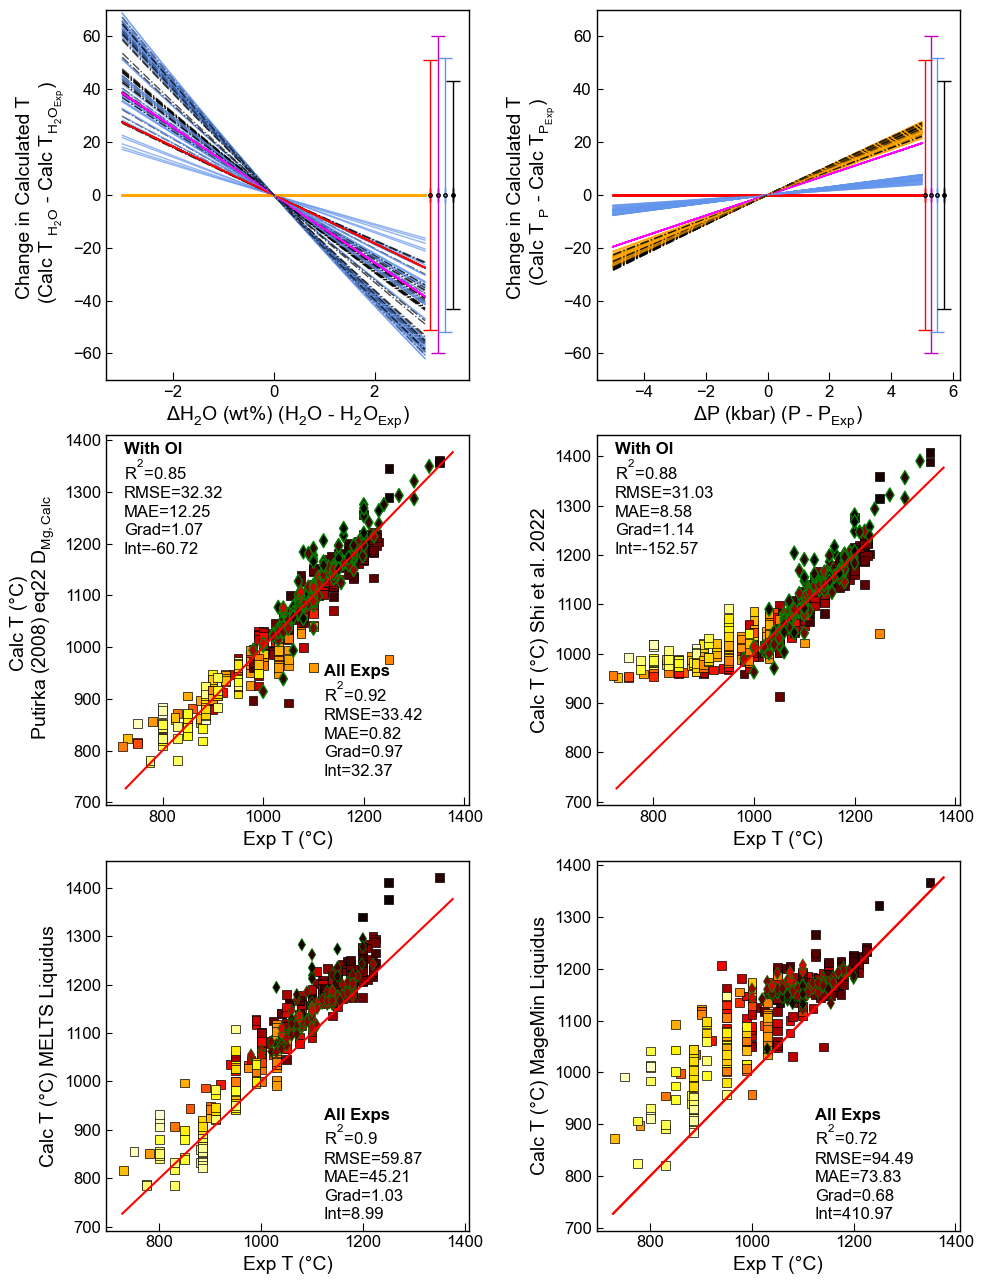

In [29]:
fig, ((ax1, ax2), (ax3, ax6), (ax4, ax5)) = plt.subplots(3, 2, figsize=(10,13))

# Ax1, ax2 is sensitivity
#ax3 is eq22, ax6 is Shi
#ax4 is MELTS, ax5 is magemin




##################################### H and P sensiviity ##############################
for i in range(0, np.shape(HSens_eq14)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    ax1.plot(delta_H_lin, -(Exp_HSens_eq14.iloc[i]-HSens_eq14[:, i]),
             '-', color='red', alpha=0.7, lw=1)
    ax1.plot(delta_H_lin, -(Exp_HSens_eq15.iloc[i]-HSens_eq15[:, i]),
             '-', color='magenta', alpha=0.7, lw=1)

    ax1.plot(delta_H_lin, -(Exp_HSens_eq19Dmg.iloc[i]-HSens_eq19Dmg[:, i]),
             '-', color='orange', alpha=0.7, lw=1)


    ax1.plot(delta_H_lin, -(Exp_HSens_eq21Dmg.iloc[i]-HSens_eq21Dmg[:, i]),
             '-', color='cornflowerblue', alpha=0.7, lw=1)

    ax1.plot(delta_H_lin, -(Exp_HSens_eq22Dmg.iloc[i]-HSens_eq22Dmg[:, i]),
             '-.', color='k', alpha=0.7, lw=1) 
    
    
    
    ax2.plot(delta_P_lin, -(Exp_PSens_eq14.iloc[i]-PSens_eq14[:, i]),
             '-', color='red', alpha=0.7, lw=1)
    ax2.plot(delta_P_lin, -(Exp_PSens_eq15.iloc[i]-PSens_eq15[:, i]),
             '-', color='magenta', alpha=0.7, lw=1)

    ax2.plot(delta_P_lin, -(Exp_PSens_eq19Dmg.iloc[i]-PSens_eq19Dmg[:, i]),
             '-', color='orange', alpha=0.7, lw=1)


    ax2.plot(delta_P_lin, -(Exp_PSens_eq21Dmg.iloc[i]-PSens_eq21Dmg[:, i]),
             '-', color='cornflowerblue', alpha=0.7, lw=1)

    ax2.plot(delta_P_lin, -(Exp_PSens_eq22Dmg.iloc[i]-PSens_eq22Dmg[:, i]),
             '-.', color='k', alpha=0.7, lw=1)    
    
    
############################### EQuatoin 22 Putirka ######################

Liq_has_Ol=Liq_only_input['Ol']=="Yes"
ax3.plot([1000-273.15, 1650-273.15], [1000-273.15, 1650-273.15], '-r')


s=ax3.scatter(Liq_only_input['T_K'].loc[Press_new&Quantmethod&(~Liq_has_Ol)]-273.15,
            eq22Dmg[Quantmethod&(~Liq_has_Ol)]-273.15, marker='s', s=40, edgecolors='k', linewidths=0.5,
            c=Liq_only_input['SiO2_Liq'].loc[Press_new&Quantmethod&(~Liq_has_Ol)], cmap='hot',
vmin = 45, vmax = 80)

s=ax3.scatter(Liq_Ol_input['T_K_x'].loc[Press_new_Ol&Quantmethod_Ol]-273.15,
            eq22Dmg_ol[Quantmethod_Ol]-273.15, marker='d', s=50, edgecolors='g', linewidths=1,
            c=Liq_Ol_input['SiO2_Liq'].loc[Press_new_Ol&Quantmethod_Ol], cmap='hot',
vmin = 45, vmax = 80)

Stats_WithOl=pt.calculate_R2(Liq_Ol_input['T_K_x'].loc[Press_new_Ol&Quantmethod_Ol]-273.15, 
            eq22Dmg_ol[Quantmethod_Ol]-273.15, xy=False, df=True)

ax3.annotate("With Ol", xy=(0.05, 0.95),
xycoords="axes fraction", fontsize=12, weight='bold')
ax3.annotate("R$^{2}$="+str(Stats_WithOl['R2'].iloc[0]), xy=(0.05, 0.88),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(Stats_WithOl['RMSE'].iloc[0]), xy=(0.05, 0.83),
xycoords="axes fraction", fontsize=12)
ax3.annotate("MAE="+str(Stats_WithOl['Mean'].iloc[0]), xy=(0.05, 0.78),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(Stats_WithOl['Grad'].iloc[0]), xy=(0.05, 0.73),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(Stats_WithOl['Int'].iloc[0]), xy=(0.05, 0.68),
xycoords="axes fraction", fontsize=12)


Stats_WithoutOl=pt.calculate_R2(Liq_only_input['T_K'].loc[Press_new&Quantmethod]-273.15, 
            eq22Dmg[Quantmethod]-273.15, xy=False, df=True)

ax3.annotate("All Exps", xy=(0.6, 0.35),
xycoords="axes fraction", fontsize=12, weight='bold')
ax3.annotate("R$^{2}$="+str(Stats_WithoutOl['R2'].iloc[0]), xy=(0.6, 0.28),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(Stats_WithoutOl['RMSE'].iloc[0]), xy=(0.6, 0.23),
xycoords="axes fraction", fontsize=12)
ax3.annotate("MAE="+str(Stats_WithoutOl['Mean'].iloc[0]), xy=(0.6, 0.18),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(Stats_WithoutOl['Grad'].iloc[0]), xy=(0.6, 0.13),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(Stats_WithoutOl['Int'].iloc[0]), xy=(0.6, 0.08),
xycoords="axes fraction", fontsize=12)

ax2.set_xlabel('ΔP (kbar) (P - P$_{Exp}$)')
ax2.set_ylabel('Change in Calculated T \n (Calc T $_{P}$ - Calc T$_{P_{Exp} }$)')

ax1.set_xlabel('ΔH$_2$O (wt%) (H$_2$O - H$_2$O$_{Exp}$)')
ax1.set_ylabel('Change in Calculated T \n (Calc T $_{H{_2}O}$ - Calc T$_{H{_2}O_{Exp} }$)')

ax3.set_xlabel('Exp T (°C)')
ax3.set_ylabel('Calc T (°C) \n Putirka (2008) eq22 D$_{Mg, Calc}$')


######################## Shi et al. in prep #################################

NotAl=Liq_Ol_input['Citation_x']!="Almeev2013_notinLEPR"
s=ax6.scatter(Liq_only_input['T_K'].loc[Press_new&Quantmethod&(~Liq_has_Ol)]-273.15,
            eqShi[Quantmethod&(~Liq_has_Ol)]-273.15, marker='s', s=40, edgecolors='k', linewidths=0.5,
            c=Liq_only_input['SiO2_Liq'].loc[Press_new&Quantmethod&(~Liq_has_Ol)], cmap='hot',
vmin = 45, vmax = 80)

s=ax6.scatter(Liq_Ol_input['T_K_x'].loc[Press_new_Ol&Quantmethod_Ol&NotAl]-273.15,
            eqShi_ol[Quantmethod_Ol&NotAl]-273.15, marker='d', s=50, edgecolors='g', linewidths=1,
            c=Liq_Ol_input['SiO2_Liq'].loc[Press_new_Ol&Quantmethod_Ol&NotAl], cmap='hot',
vmin = 45, vmax = 80)

Stats_WithOl_Shi=pt.calculate_R2(Liq_Ol_input['T_K_x'].loc[Press_new_Ol&Quantmethod_Ol&NotAl]-273.15, 
            eqShi_ol[Quantmethod_Ol&NotAl]-273.15, xy=False, df=True)


Stats_WithOl_Shi=pt.calculate_R2(Liq_Ol_input['T_K_x'].loc[Press_new_Ol&Quantmethod_Ol&NotAl]-273.15, 
            eqShi_ol[Quantmethod_Ol&NotAl]-273.15, xy=False, df=True)

ax6.annotate("With Ol", xy=(0.05, 0.95),
xycoords="axes fraction", fontsize=12, weight='bold')
ax6.annotate("R$^{2}$="+str(Stats_WithOl_Shi['R2'].iloc[0]), xy=(0.05, 0.88),
xycoords="axes fraction", fontsize=12)
ax6.annotate("RMSE="+str(Stats_WithOl_Shi['RMSE'].iloc[0]), xy=(0.05, 0.83),
xycoords="axes fraction", fontsize=12)
ax6.annotate("MAE="+str(Stats_WithOl_Shi['Mean'].iloc[0]), xy=(0.05, 0.78),
xycoords="axes fraction", fontsize=12)
ax6.annotate("Grad="+str(Stats_WithOl_Shi['Grad'].iloc[0]), xy=(0.05, 0.73),
xycoords="axes fraction", fontsize=12)
ax6.annotate("Int="+str(Stats_WithOl_Shi['Int'].iloc[0]), xy=(0.05, 0.68),
xycoords="axes fraction", fontsize=12)


ax6.set_xlabel('Exp T (°C)')
ax6.set_ylabel('Calc T (°C) Shi et al. 2022')

################## MELTS #########################################33

ax4.set_xlabel('Exp T (°C)')
ax4.set_ylabel('Calc T (°C) MELTS Liquidus')
withOl=MELTS_MageMin['Ol']=="Yes"
nonzeroMELTS=(MELTS_MageMin['T_out_MELTS']>0) & (MELTS_MageMin['H2O_Liq']>0)
# ax4.plot(MELTS_MageMin['T_K'].loc[nonzero&MELTS_MageMinQuantMethod]-273.15, 
#          MELTS_MageMin['T_out_MELTS'].loc[nonzero&MELTS_MageMinQuantMethod], 'ok', mfc='white')


s=ax4.scatter(MELTS_MageMin['T_K'].loc[nonzero&MELTS_MageMinQuantMethod&(~withOl)]-273.15, 
          MELTS_MageMin['T_out_MELTS'].loc[nonzero&MELTS_MageMinQuantMethod&(~withOl)],
            marker='s', s=40, edgecolors='k', linewidths=0.5,
            c=MELTS_MageMin['SiO2_Liq'].loc[nonzero&MELTS_MageMinQuantMethod&(~withOl)], cmap='hot',
vmin = 45, vmax = 80)


s=ax4.scatter(MELTS_MageMin['T_K'].loc[nonzero&MELTS_MageMinQuantMethod&withOl]-273.15, 
          MELTS_MageMin['T_out_MELTS'].loc[nonzero&MELTS_MageMinQuantMethod&withOl],
            marker='d', s=40, edgecolors='g', linewidths=0.5,
            c=MELTS_MageMin['SiO2_Liq'].loc[nonzero&MELTS_MageMinQuantMethod&withOl], cmap='hot',
vmin = 45, vmax = 80)


Stats_MELTS_MageMin=pt.calculate_R2(MELTS_MageMin['T_K'].loc[nonzeroMELTS&MELTS_MageMinQuantMethod]-273.15, 
                            MELTS_MageMin['T_out_MELTS'].loc[nonzeroMELTS&MELTS_MageMinQuantMethod], xy=False, df=True)

# ax4.annotate("Without Ol", xy=(0.6, 0.28),
# xycoords="axes fraction", fontsize=12, weight='bold')
ax4.annotate("All Exps", xy=(0.6, 0.3),
xycoords="axes fraction", fontsize=12, weight='bold')
ax4.annotate("R$^{2}$="+str(Stats_MELTS_MageMin['R2'].iloc[0]), xy=(0.6, 0.23),
xycoords="axes fraction", fontsize=12)
ax4.annotate("RMSE="+str(Stats_MELTS_MageMin['RMSE'].iloc[0]), xy=(0.6, 0.18),
xycoords="axes fraction", fontsize=12)
ax4.annotate("MAE="+str(Stats_MELTS_MageMin['Mean'].iloc[0]), xy=(0.6, 0.13),
xycoords="axes fraction", fontsize=12)
ax4.annotate("Grad="+str(Stats_MELTS_MageMin['Grad'].iloc[0]), xy=(0.6, 0.08),
xycoords="axes fraction", fontsize=12)
ax4.annotate("Int="+str(Stats_MELTS_MageMin['Int'].iloc[0]), xy=(0.6, 0.03),
xycoords="axes fraction", fontsize=12)

ax4.plot([1000-273.15, 1650-273.15], [1000-273.15, 1650-273.15], '-r')

######## MageMin ###################3
NoK2O=MELTS_MageMin['K2O_Liq']==0
nonzeroMageMin=(MELTS_MageMin['T_out_Holland']>0) & (MELTS_MageMin['H2O_Liq']>0)

s=ax5.scatter(MELTS_MageMin['T_K'].loc[nonzeroMageMin&MELTS_MageMinQuantMethod&(~withOl)]-273.15,
             MELTS_MageMin['T_out_Holland'].loc[nonzeroMageMin&MELTS_MageMinQuantMethod&(~withOl)],
            marker='s', s=40, edgecolors='k', linewidths=0.5,
            c=MELTS_MageMin['SiO2_Liq'].loc[nonzeroMageMin&MELTS_MageMinQuantMethod&(~withOl)], cmap='hot',
vmin = 45, vmax = 80)

s=ax5.scatter(MELTS_MageMin['T_K'].loc[nonzeroMageMin&MELTS_MageMinQuantMethod&withOl]-273.15,
             MELTS_MageMin['T_out_Holland'].loc[nonzeroMageMin&MELTS_MageMinQuantMethod&withOl],
            marker='d', s=40, edgecolors='g', linewidths=0.5,
            c=MELTS_MageMin['SiO2_Liq'].loc[nonzeroMageMin&MELTS_MageMinQuantMethod&withOl], cmap='hot',
vmin = 45, vmax = 80)



# ax5.plot(MELTS_MageMin['T_K'].loc[nonzero&MELTS_MageMinQuantMethod]-273.15, 
#          MELTS_MageMin['T_out_Holland'].loc[nonzeroMageMin&MELTS_MageMinQuantMethod], 'ok', mfc='white')

# ax5.plot(MELTS_MageMin['T_K'].loc[nonzero&MELTS_MageMinQuantMethod&NoK2O]-273.15, 
#          MELTS_MageMin['T_out_Holland'].loc[nonzeroMageMin&MELTS_MageMinQuantMethod&NoK2O], 'ok', mfc='blue')



Stats_MELTS_MageMin=pt.calculate_R2(MELTS_MageMin['T_K'].loc[nonzeroMageMin&MELTS_MageMinQuantMethod]-273.15, 
                            MELTS_MageMin['T_out_Holland'].loc[nonzeroMageMin&MELTS_MageMinQuantMethod], xy=False, df=True)

Stats_MELTS_MageMin_WithK=pt.calculate_R2(MELTS_MageMin['T_K'].loc[nonzeroMageMin&MELTS_MageMinQuantMethod&(~NoK2O)]-273.15, 
                            MELTS_MageMin['T_out_Holland'].loc[nonzeroMageMin&MELTS_MageMinQuantMethod&(~NoK2O)], xy=False, df=True)


ax5.set_xlabel('Exp T (°C)')
ax5.set_ylabel('Calc T (°C) MELTS_MageMin Liquidus')
# ax5.annotate("Without Ol", xy=(0.6, 0.28),
# xycoords="axes fraction", fontsize=12, weight='bold')

ax5.annotate("All Exps", xy=(0.6, 0.3),
xycoords="axes fraction", fontsize=12, weight='bold')
ax5.annotate("R$^{2}$="+str(Stats_MELTS_MageMin['R2'].iloc[0]), xy=(0.6, 0.23),
xycoords="axes fraction", fontsize=12)
ax5.annotate("RMSE="+str(Stats_MELTS_MageMin['RMSE'].iloc[0]), xy=(0.6, 0.18),
xycoords="axes fraction", fontsize=12)
ax5.annotate("MAE="+str(Stats_MELTS_MageMin['Mean'].iloc[0]), xy=(0.6, 0.13),
xycoords="axes fraction", fontsize=12)
ax5.annotate("Grad="+str(Stats_MELTS_MageMin['Grad'].iloc[0]), xy=(0.6, 0.08),
xycoords="axes fraction", fontsize=12)
ax5.annotate("Int="+str(Stats_MELTS_MageMin['Int'].iloc[0]), xy=(0.6, 0.03),
xycoords="axes fraction", fontsize=12)

ax5.plot([1000-273.15, 1650-273.15], [1000-273.15, 1650-273.15], '-r')


ax5.set_xlabel('Exp T (°C)')
ax5.set_ylabel('Calc T (°C) MageMin Liquidus')
# ax5.annotate("Without Ol", xy=(0.6, 0.28),
# xycoords="axes fraction", fontsize=12, weight='bold')

x_mm=0.05
# ax5.annotate("K$_2$O>0", xy=(x_mm, 0.95),
# xycoords="axes fraction", fontsize=12, weight='bold')
# ax5.annotate("R$^{2}$="+str(Stats_MELTS_MageMin_WithK['R2'].iloc[0]), xy=(x_mm, 0.87),
# xycoords="axes fraction", fontsize=12)
# ax5.annotate("RMSE="+str(Stats_MELTS_MageMin_WithK['RMSE'].iloc[0]), xy=(x_mm, 0.83),
# xycoords="axes fraction", fontsize=12)
# ax5.annotate("MAE="+str(Stats_MELTS_MageMin_WithK['Mean'].iloc[0]), xy=(x_mm, 0.77),
# xycoords="axes fraction", fontsize=12)
# ax5.annotate("Grad="+str(Stats_MELTS_MageMin_WithK['Grad'].iloc[0]), xy=(x_mm, 0.73),
# xycoords="axes fraction", fontsize=12)
# ax5.annotate("Int="+str(Stats_MELTS_MageMin_WithK['Int'].iloc[0]), xy=(x_mm, 0.68),
# xycoords="axes fraction", fontsize=12)

ax5.plot([1000-273.15, 1650-273.15], [1000-273.15, 1650-273.15], '-r')
ax6.plot([1000-273.15, 1650-273.15], [1000-273.15, 1650-273.15], '-r')

## Errorbars
#Equation14
ax1.errorbar(3.1, 0, xerr=0, yerr=51,
               fmt='.', ecolor='r', elinewidth=1, mfc='r', ms=5, capsize=5,
             mec='k')
#Equation15
ax1.errorbar(3.25, 0, xerr=0, yerr=60,
               fmt='.', ecolor='m', elinewidth=1, mfc='m',  ms=5, capsize=5,
             mec='k')
#Equation21
ax1.errorbar(3.4, 0, xerr=0, yerr=52,
               fmt='.', ecolor='cornflowerblue', elinewidth=1, mfc='cornflowerblue',
             ms=5, capsize=5,
             mec='k')
#Equation22
ax1.errorbar(3.55, 0, xerr=0, yerr=43,
               fmt='.', ecolor='k', elinewidth=1, mfc='k',
             ms=5, capsize=5,
             mec='k')

#Equation14
ax2.errorbar(5.1, 0, xerr=0, yerr=51,
               fmt='.', ecolor='r', elinewidth=1, mfc='r', ms=5, capsize=5,
             mec='k')
#Equation15
ax2.errorbar(5.3, 0, xerr=0, yerr=60,
               fmt='.', ecolor='m', elinewidth=1, mfc='m',  ms=5, capsize=5,
             mec='k')
#Equation21
ax2.errorbar(5.5, 0, xerr=0, yerr=52,
               fmt='.', ecolor='cornflowerblue', elinewidth=1, mfc='cornflowerblue',
             ms=5, capsize=5,
             mec='k')
#Equation22
ax2.errorbar(5.7, 0, xerr=0, yerr=43,
               fmt='.', ecolor='k', elinewidth=1, mfc='k',
             ms=5, capsize=5,
             mec='k')
ax1.set_ylim([-70, 70])
ax2.set_ylim([-70, 70])
fig.tight_layout()
plt.subplots_adjust(wspace=0.35, hspace=0.15)
#fig.colorbar(s, ax=ax3)
fig.savefig('Thermometer_Assesment_Stability_col.png', dpi=200)

## Supplementary Figures

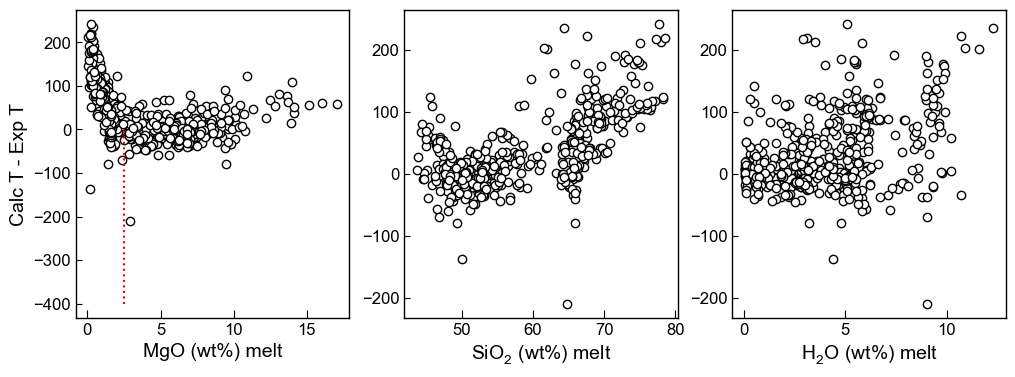

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax2.plot(Liq_only_input['SiO2_Liq'].loc[Press_new&Quantmethod], eqShi[Quantmethod]-Liq_only_input['T_K'].loc[Press_new&Quantmethod], 'ok', mfc='white')
ax1.plot(Liq_only_input['MgO_Liq'].loc[Press_new&Quantmethod], eqShi[Quantmethod]-Liq_only_input['T_K'].loc[Press_new&Quantmethod], 'ok', mfc='white')
ax3.plot(Liq_only_input['H2O_Liq'].loc[Press_new&Quantmethod], eqShi[Quantmethod]-Liq_only_input['T_K'].loc[Press_new&Quantmethod], 'ok', mfc='white')
ax1.plot([2.5, 2.5], [-400, 0], ':r')
ax1.set_ylabel('Calc T - Exp T')
ax1.set_xlabel('MgO (wt%) melt')
ax2.set_xlabel('SiO$_2$ (wt%) melt')
ax3.set_xlabel('H$_2$O (wt%) melt')
fig.savefig('Shi_Supplement')

In [31]:
eqHelzMgO=pt.calculate_liq_only_temp(liq_comps=myLiquids1,
                equationT='T_Helz1987_MgO', P=Liq_only_input['P_kbar'].loc[Press_new])

eqHelzMgO_ol=pt.calculate_liq_only_temp(liq_comps=myLiquids1_Ol,
                equationT='T_Helz1987_MgO', P=Liq_Ol_input['P_kbar_x'].loc[Press_new_Ol])


eq16=pt.calculate_liq_only_temp(liq_comps=myLiquids1,
                equationT='T_Helz1987_MgO', P=Liq_only_input['P_kbar'].loc[Press_new])

eq16_ol=pt.calculate_liq_only_temp(liq_comps=myLiquids1_Ol,
                equationT='T_Helz1987_MgO', P=Liq_Ol_input['P_kbar_x'].loc[Press_new_Ol])

When applied to N=1077 liquids (SiO2=43.7-79 wt%, MgO=0.07-17.1 wt%) with a wide variety of equilibrium phases, all thermometers except Eq16 yield R2 values >0.8. Eq16 performs well on samples with >2.5 wt% MgO, but can predict temperatures up to 500°C too high for lower MgO samples.  Thermometers which do not contain a term for melt H2O content unsurprisingly have larger RMSEs, and show strong correlations between H2O and the discrepancy between the calculated and experimental temperature.

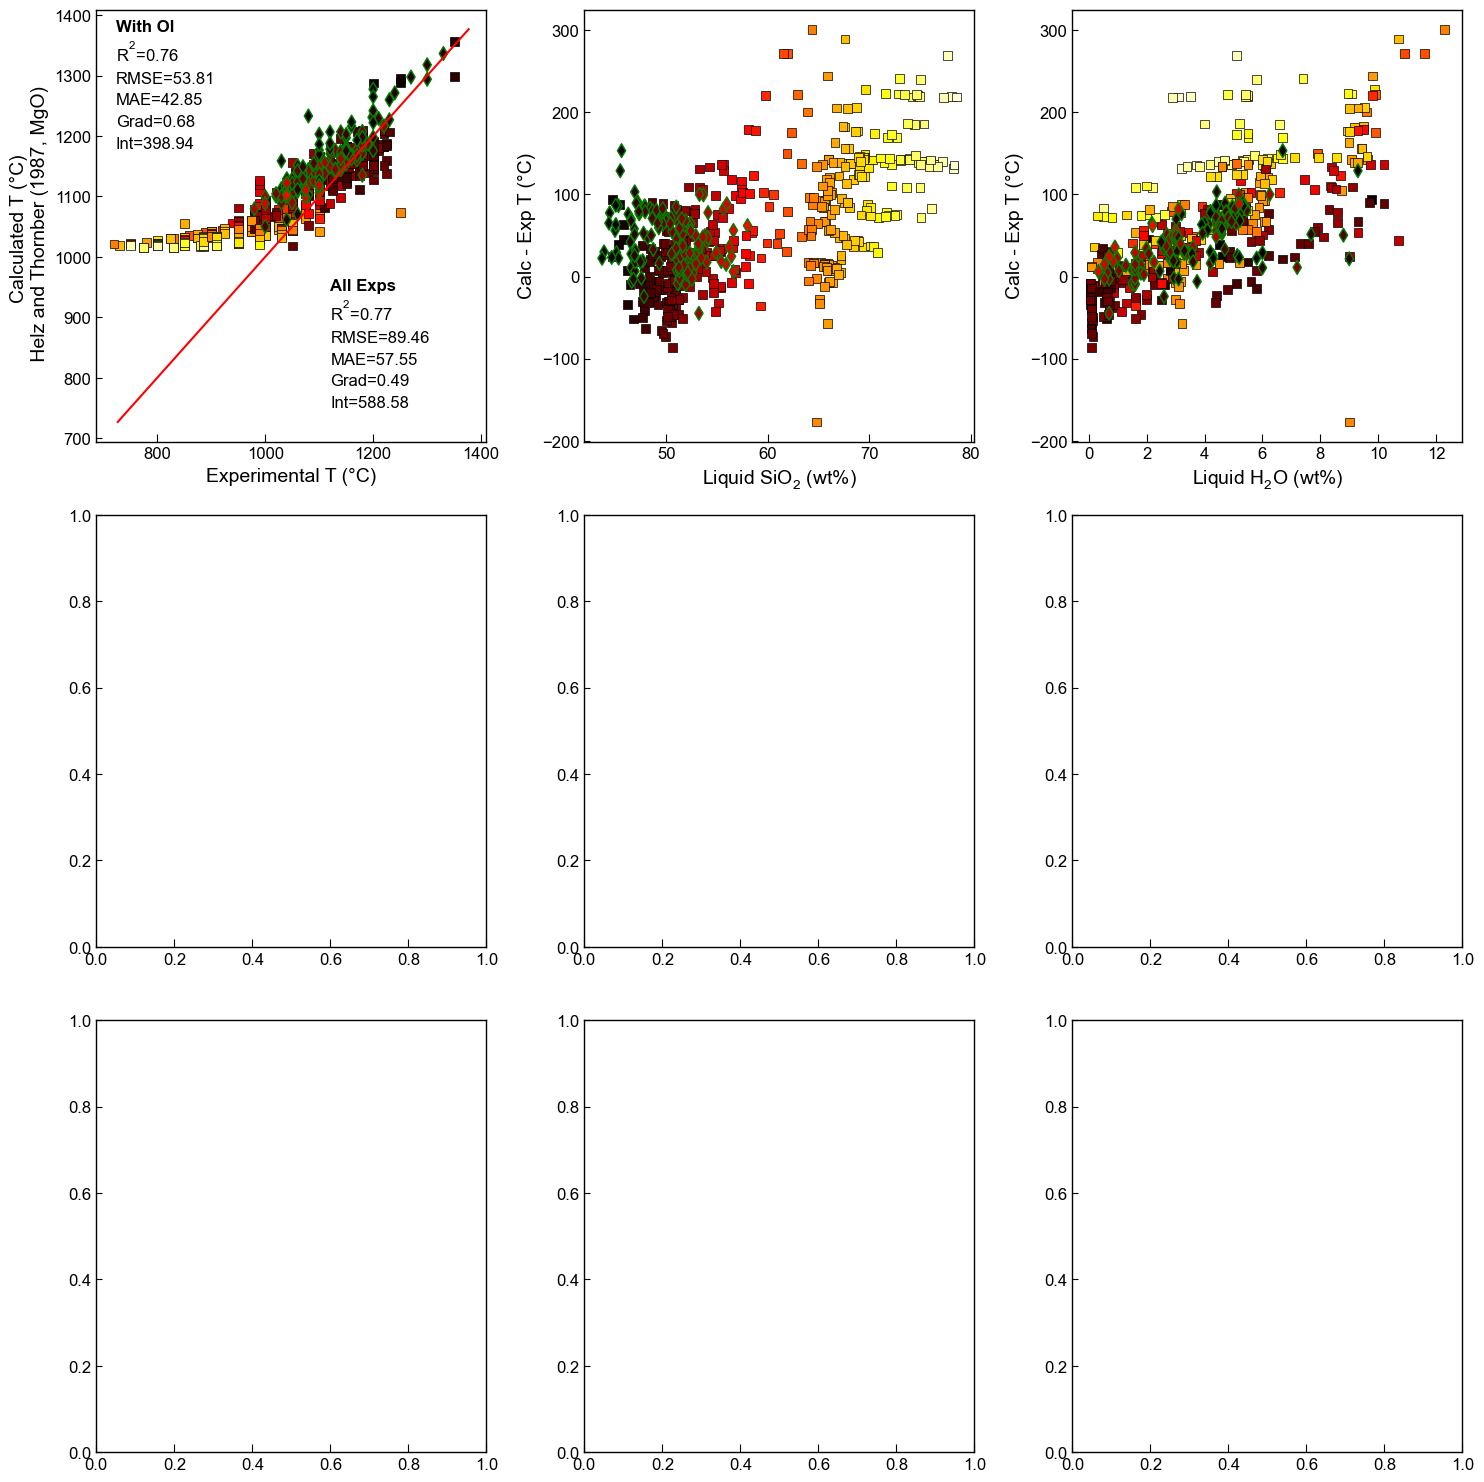

In [32]:
fig, ((ax1, ax2, ax2b), (ax3, ax4, ax4b), (ax5, ax6, ax6b)) = plt.subplots(3, 3, figsize=(15,15))


#### HElz 1987 ########################

Liq_has_Ol=Liq_only_input['Ol']=="Yes"
ax1.plot([1000-273.15, 1650-273.15], [1000-273.15, 1650-273.15], '-r')


s=ax1.scatter(Liq_only_input['T_K'].loc[Press_new&Quantmethod&(~Liq_has_Ol)]-273.15,
            eqHelzMgO[Quantmethod&(~Liq_has_Ol)]-273.15, marker='s', s=40, edgecolors='k', linewidths=0.5,
            c=Liq_only_input['SiO2_Liq'].loc[Press_new&Quantmethod&(~Liq_has_Ol)], cmap='hot',
vmin = 45, vmax = 80)

s=ax1.scatter(Liq_Ol_input['T_K_x'].loc[Press_new_Ol&Quantmethod_Ol]-273.15,
            eqHelzMgO_ol[Quantmethod_Ol]-273.15, marker='d', s=50, edgecolors='g', linewidths=1,
            c=Liq_Ol_input['SiO2_Liq'].loc[Press_new_Ol&Quantmethod_Ol], cmap='hot',
vmin = 45, vmax = 80)

Stats_WithOl=pt.calculate_R2(Liq_Ol_input['T_K_x'].loc[Press_new_Ol&Quantmethod_Ol]-273.15, 
            eqHelzMgO_ol[Quantmethod_Ol]-273.15, xy=False, df=True)

Stats_WithoutOl=pt.calculate_R2(Liq_only_input['T_K'].loc[Press_new&Quantmethod]-273.15, 
            eqHelzMgO[Quantmethod]-273.15, xy=False, df=True)

ax1.annotate("With Ol", xy=(0.05, 0.95),
xycoords="axes fraction", fontsize=12, weight='bold')
ax1.annotate("R$^{2}$="+str(Stats_WithOl['R2'].iloc[0]), xy=(0.05, 0.88),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_WithOl['RMSE'].iloc[0]), xy=(0.05, 0.83),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_WithOl['Mean'].iloc[0]), xy=(0.05, 0.78),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(Stats_WithOl['Grad'].iloc[0]), xy=(0.05, 0.73),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(Stats_WithOl['Int'].iloc[0]), xy=(0.05, 0.68),
xycoords="axes fraction", fontsize=12)

ax1.annotate("All Exps", xy=(0.6, 0.35),
xycoords="axes fraction", fontsize=12, weight='bold')
ax1.annotate("R$^{2}$="+str(Stats_WithoutOl['R2'].iloc[0]), xy=(0.6, 0.28),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_WithoutOl['RMSE'].iloc[0]), xy=(0.6, 0.23),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_WithoutOl['Mean'].iloc[0]), xy=(0.6, 0.18),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(Stats_WithoutOl['Grad'].iloc[0]), xy=(0.6, 0.13),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(Stats_WithoutOl['Int'].iloc[0]), xy=(0.6, 0.08),
xycoords="axes fraction", fontsize=12)


ax1.set_ylabel('Calculated T (°C) \n Helz and Thornber (1987, MgO)')
ax1.set_xlabel('Experimental T (°C)')


ax2.scatter(Liq_only_input['SiO2_Liq'].loc[Press_new&Quantmethod&(~Liq_has_Ol)],
            (eqHelzMgO[Quantmethod&(~Liq_has_Ol)]-273.15)-(Liq_only_input['T_K'].loc[Press_new&Quantmethod&(~Liq_has_Ol)]-273.15),
             marker='s', s=40, edgecolors='k', linewidths=0.5,
            c=Liq_only_input['SiO2_Liq'].loc[Press_new&Quantmethod&(~Liq_has_Ol)], cmap='hot',
vmin = 45, vmax = 80)
ax2.set_xlabel('Liquid SiO$_2$ (wt%)')
ax2.set_ylabel('Calc - Exp T (°C)')

ax2.scatter(Liq_Ol_input['SiO2_Liq'].loc[Press_new_Ol&Quantmethod_Ol],
    eqHelzMgO_ol[Quantmethod_Ol]-Liq_Ol_input['T_K_x'].loc[Press_new_Ol&Quantmethod_Ol],
            marker='d', s=50, edgecolors='g', linewidths=1,
            c=Liq_Ol_input['SiO2_Liq'].loc[Press_new_Ol&Quantmethod_Ol], cmap='hot',
vmin = 45, vmax = 80)
    
    
ax2b.scatter(Liq_only_input['H2O_Liq'].loc[Press_new&Quantmethod&(~Liq_has_Ol)],
            (eqHelzMgO[Quantmethod&(~Liq_has_Ol)]-273.15)-(Liq_only_input['T_K'].loc[Press_new&Quantmethod&(~Liq_has_Ol)]-273.15),
             marker='s', s=40, edgecolors='k', linewidths=0.5,
            c=Liq_only_input['SiO2_Liq'].loc[Press_new&Quantmethod&(~Liq_has_Ol)], cmap='hot',
vmin = 45, vmax = 80)
ax2b.set_xlabel('Liquid H$_2$O (wt%)')
ax2b.set_ylabel('Calc - Exp T (°C)')

ax2b.scatter(Liq_Ol_input['H2O_Liq'].loc[Press_new_Ol&Quantmethod_Ol],
    eqHelzMgO_ol[Quantmethod_Ol]-Liq_Ol_input['T_K_x'].loc[Press_new_Ol&Quantmethod_Ol],
            marker='d', s=50, edgecolors='g', linewidths=1,
            c=Liq_Ol_input['SiO2_Liq'].loc[Press_new_Ol&Quantmethod_Ol], cmap='hot',
vmin = 45, vmax = 80)    
    
#     s=ax1.scatter(Liq_only_input['T_K'].loc[Press_new&Quantmethod&(~Liq_has_Ol)]-273.15,
#             eqHelzMgO[Quantmethod&(~Liq_has_Ol)]-273.15, marker='s', s=40, edgecolors='k', linewidths=0.5,
#             c=Liq_only_input['SiO2_Liq'].loc[Press_new&Quantmethod&(~Liq_has_Ol)], cmap='hot',
# vmin = 45, vmax = 80)
fig.tight_layout()
